In [1]:
from ploo import *
from jax import numpy as jnp, random
from tabulate import tabulate

0.597617506980896 1.9705898761749268


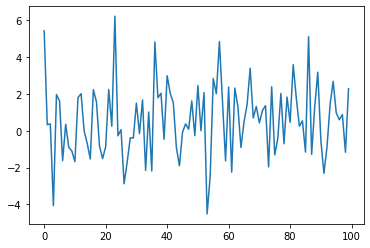

In [19]:
y = GaussianModel.generate(N=100, mu=0.5, sigma=2, seed=43)
plt.plot(y)
print(f'{jnp.mean(y)} {jnp.std(y)}')

In [50]:
gauss = GaussianModel(y)
post = run_hmc(gauss, draws=1000, warmup_steps=800, chains=8, seed=42)

Step 1/3. Starting Stan warmup using NUTS...
          800 warmup draws took 5.6 sec (143.1 iter/sec).
Step 2/3. Running main inference with 8 chains...
          8,000 HMC draws took 2.2 sec (3,711 iter/sec).
Step 3/3. Cross-validation with 100 folds using 400 chains...
          400,000 HMC draws took 3.0 sec (134,597 iter/sec).


In [15]:
post

Gaussian model inference summary

40,000 draws from 1,000 iterations on 40 chains with seed 42

Parameter      Mean  (SE)      1%    5%    25%    Median    75%    95%    99%
-----------  ------  ------  ----  ----  -----  --------  -----  -----  -----
mu             0.57  (0.20)  0.12  0.25   0.44      0.57   0.71   0.89   1.03
sigma          1.98  (0.14)  1.68  1.76   1.88      1.97   2.07   2.22   2.34

In [16]:
post.post_draws.potential_energy.T.shape

(40, 1000)

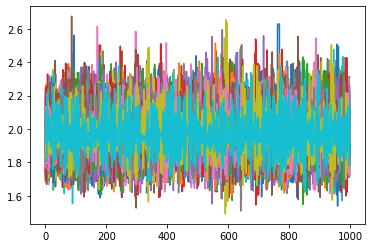

In [31]:
import matplotlib.pyplot as plt

plt.plot(post.post_draws.position['sigma'][:,:]);

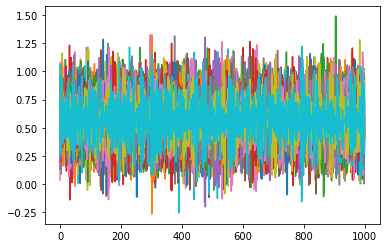

In [32]:
plt.plot(post.post_draws.position['mu'][:,:]);

In [53]:
means = []
for fold in range(len(y)):
    mu = post.cv_draws.position['mu'][:,jnp.arange(fold*4,(fold+1)*4)]
    sigma = post.cv_draws.position['sigma'][:,jnp.arange(fold*4,(fold+1)*4)]
    print(f'{fold:3d} {jnp.mean(mu):.04f} {jnp.mean(sigma):.04f}')
    means.append([jnp.mean(mu), jnp.mean(sigma)])
ameans = jnp.array(means)

  0 0.5784 1.9842
  1 0.5795 1.9844
  2 0.5786 1.9889
  3 0.5774 1.9838
  4 0.5786 1.9851
  5 0.5773 1.9856
  6 0.5747 1.9850
  7 0.5731 1.9859
  8 0.5753 1.9838
  9 0.5756 1.9839
 10 0.5771 1.9892
 11 0.5787 1.9863
 12 0.5733 1.9835
 13 0.5781 1.9838
 14 0.5779 1.9837
 15 0.5767 1.9854
 16 0.5788 1.9848
 17 0.5755 1.9871
 18 0.5794 1.9853
 19 0.5794 1.9884
 20 0.5745 1.9855
 21 0.5775 1.9808
 22 0.5756 1.9836
 23 0.5777 1.9849
 24 0.5793 1.9861
 25 0.5804 1.9842
 26 0.5778 1.9874
 27 0.5752 1.9853
 28 0.5775 1.9867
 29 0.5758 1.9844
 30 0.5780 1.9836
 31 0.5777 1.9864
 32 0.5743 1.9837
 33 0.5770 1.9869
 34 0.5765 1.9833
 35 0.5779 1.9835
 36 0.5766 1.9871
 37 0.5761 1.9874
 38 0.5766 1.9839
 39 0.5773 1.9859
 40 0.5765 1.9818
 41 0.5785 1.9876
 42 0.5782 1.9871
 43 0.5765 1.9848
 44 0.5760 1.9838
 45 0.5780 1.9830
 46 0.5776 1.9875
 47 0.5759 1.9861
 48 0.5772 1.9853
 49 0.5772 1.9848
 50 0.6184 1.9299
 51 0.6224 1.9313
 52 0.6217 1.9309
 53 0.6211 1.9281
 54 0.6150 1.9317
 55 0.6198

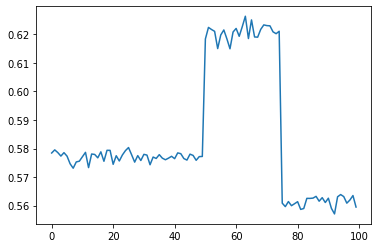

In [52]:
plt.plot(ameans[:,0]);

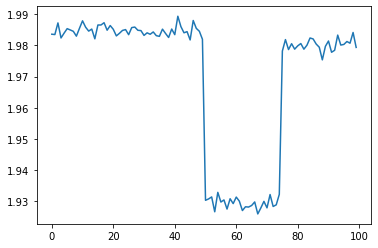

In [30]:
plt.plot(ameans[:,1]);

In [33]:
post.cv_draws.position['sigma'].shape

(1000, 400)

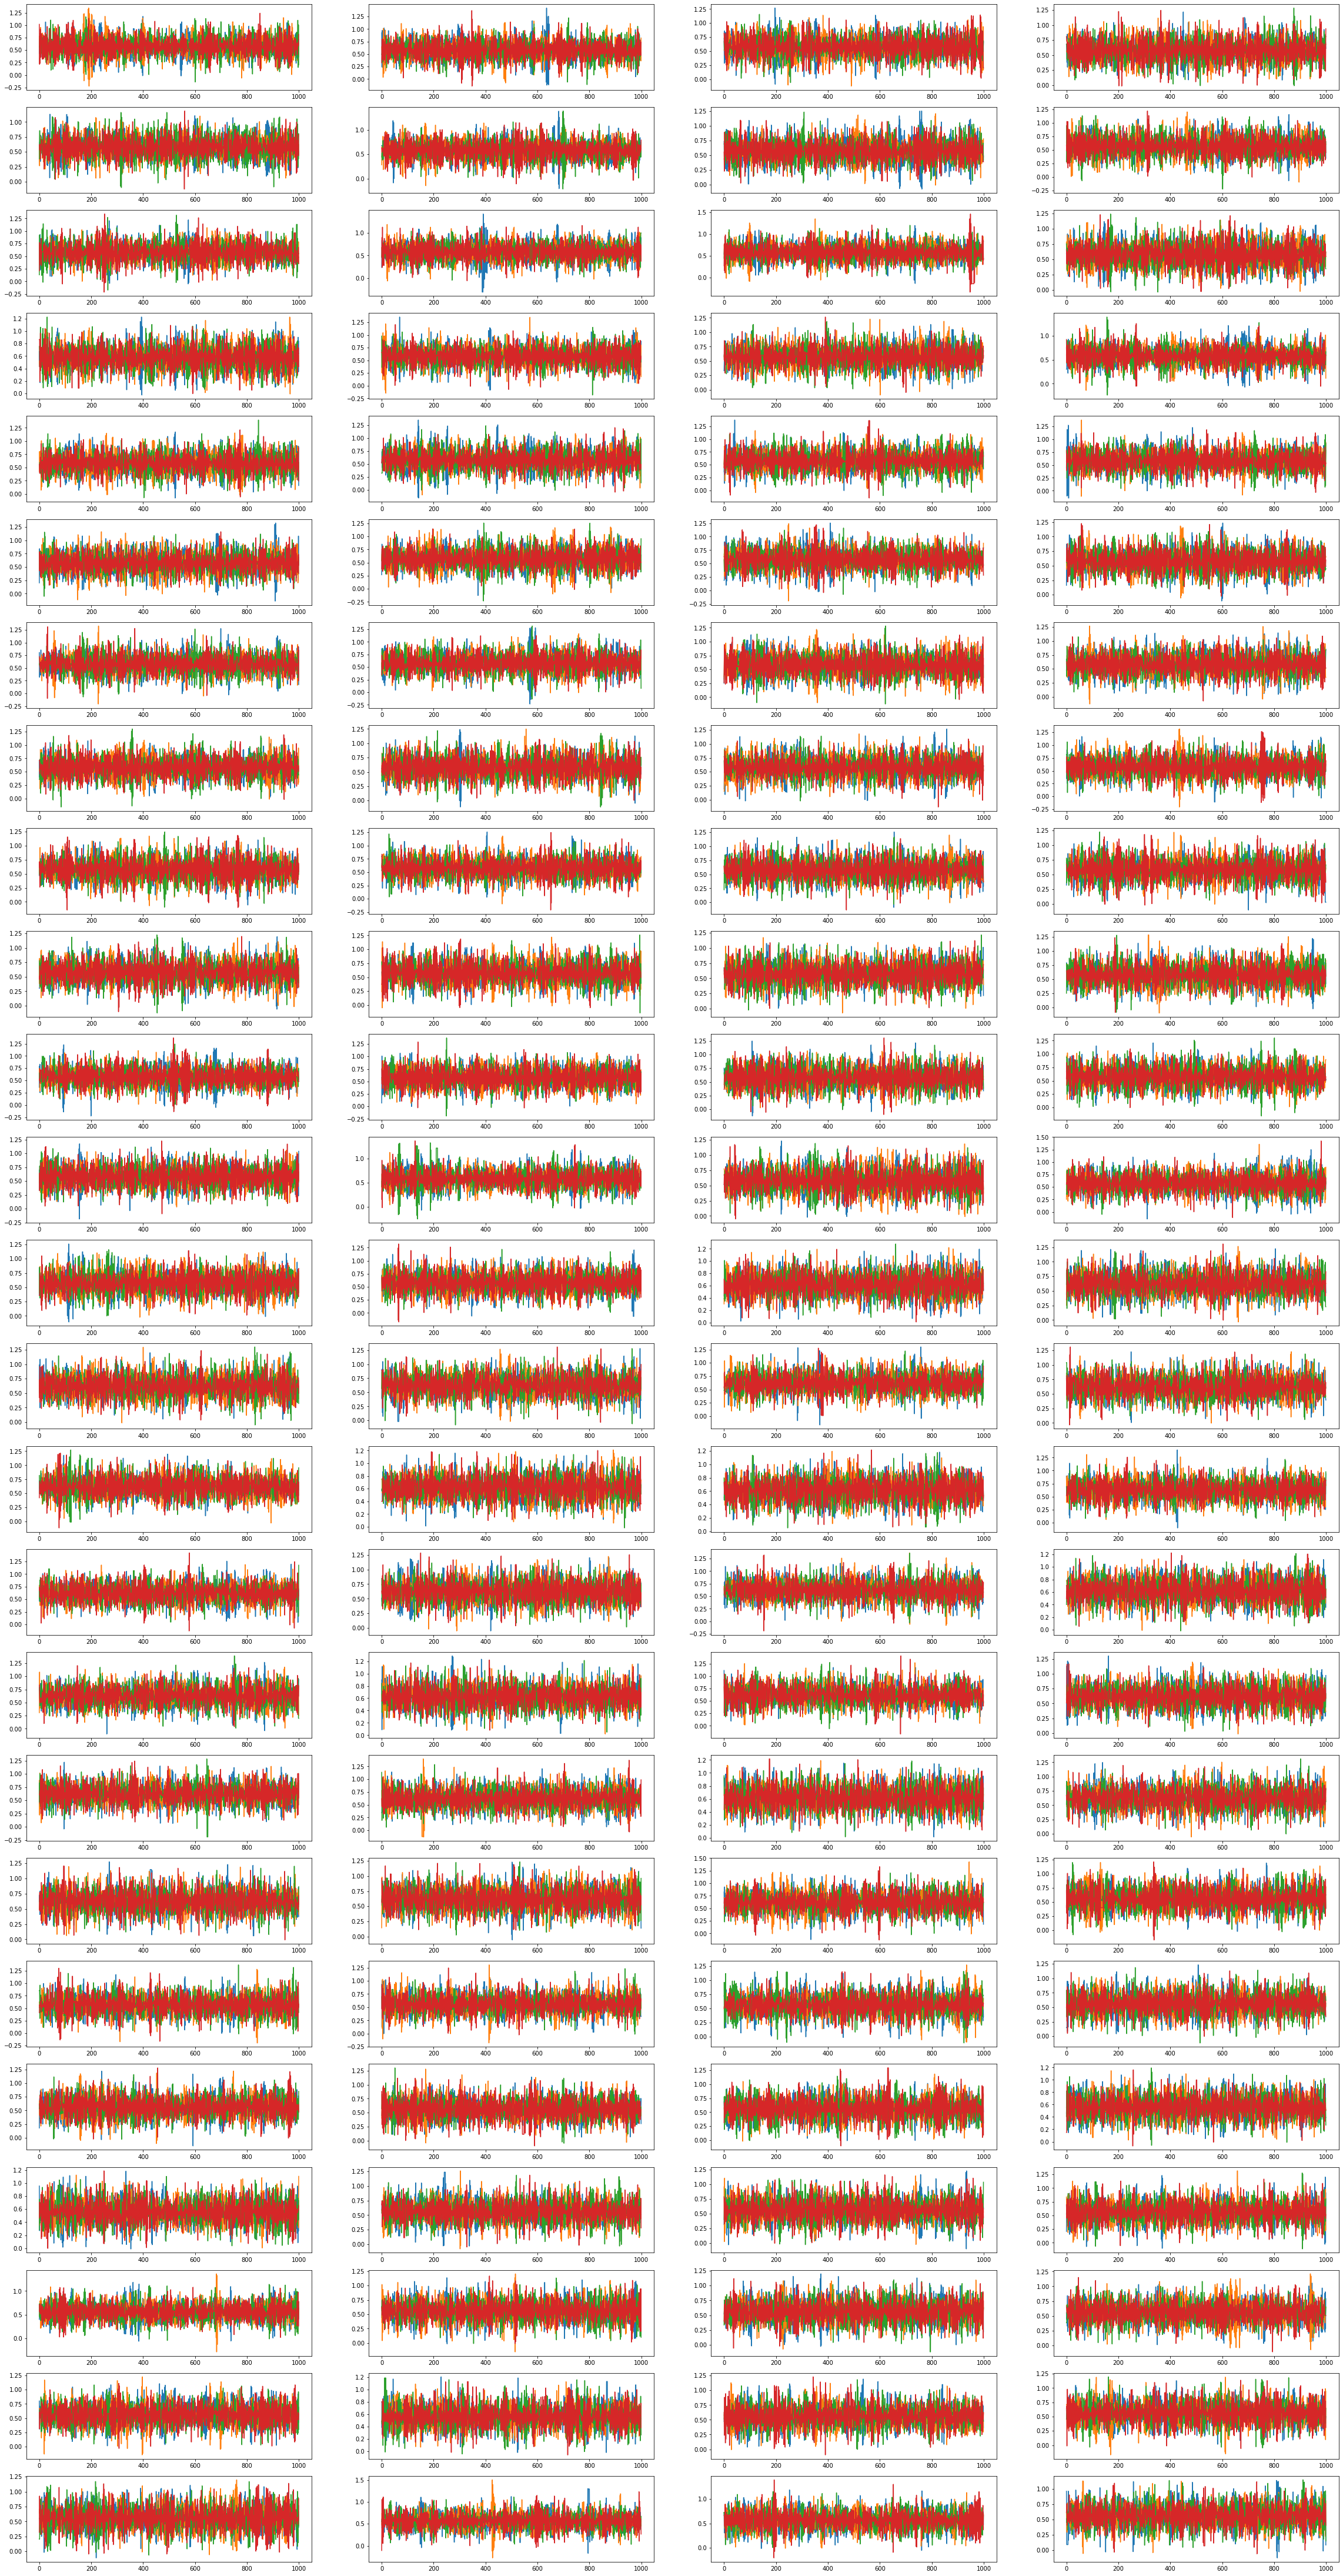

In [44]:
fig, axes = plt.subplots(nrows=int(jnp.ceil(len(y)/4)), ncols=4, figsize=(40,80))
for fold, ax in zip(range(len(y)), axes.ravel()):
    ax.plot(post.cv_draws.position['mu'][:,jnp.arange(fold*4,(fold+1)*4)])

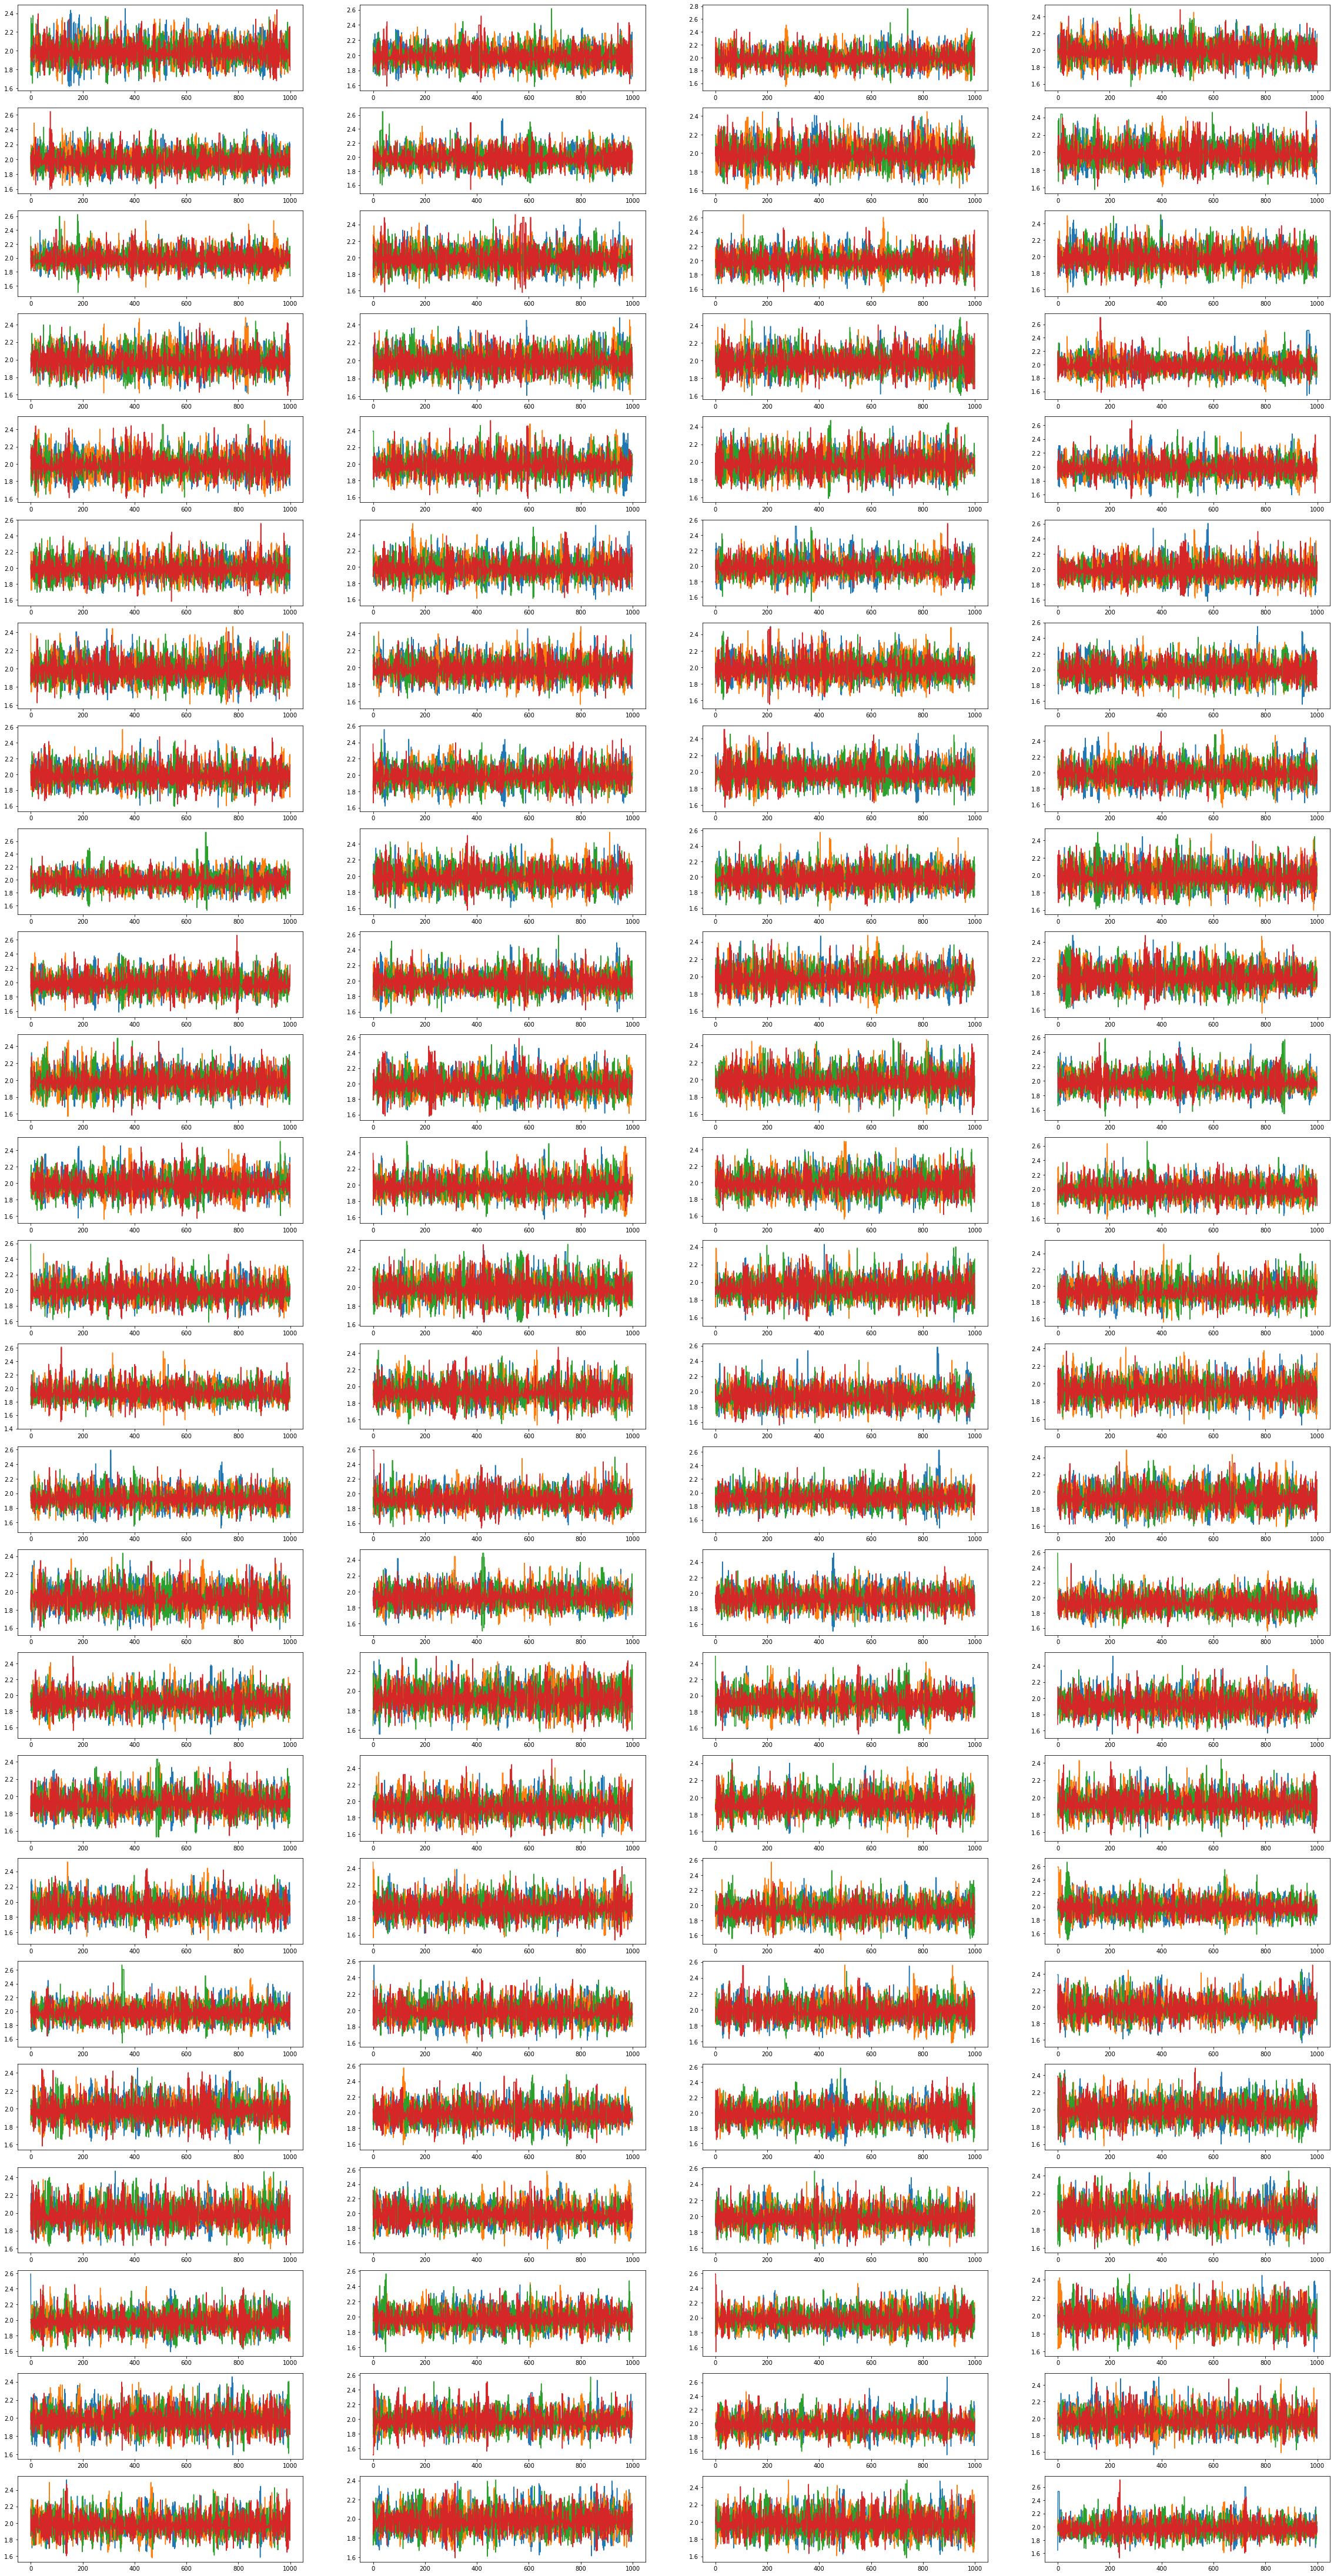

In [45]:
fig, axes = plt.subplots(nrows=int(jnp.ceil(len(y)/4)), ncols=4, figsize=(40,80))
for fold, ax in zip(range(len(y)), axes.ravel()):
    ax.plot(post.cv_draws.position['sigma'][:,jnp.arange(fold*4,(fold+1)*4)])